In [ ]:
import pandas as pd

try:
    df = pd.read_csv("WDIData.csv")
except pd.errors.ParserError:
    df = pd.read_csv("WDIData.csv", engine='python')

print(df.head())


  Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name     Indicator Code  1960  \
0  2005 PPP conversion factor, GDP (LCU per inter...      PA.NUS.PPP.05   NaN   
1  2005 PPP conversion factor, private consumptio...  PA.NUS.PRVT.PP.05   NaN   
2  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2010       2011       2012  \
0   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
1   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
2   NaN   NaN   NaN   NaN   NaN  ...  82.407647  82.827636  83.169227   
3   NaN   NaN   NaN   NaN   NaN  .

In [ ]:

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


print(df.isna().sum())

df_long = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                  var_name='Year', value_name='Value')


df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

df_long.dropna(subset=['Year', 'Value'], inplace=True)

print(df_long.shape)
print(df_long.head())


Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960              383840
                   ...  
2014              194434
2015              200346
2016              209146
2017              235535
2018              391889
Length: 63, dtype: int64
(8263058, 6)
   Country Name Country Code  \
50   Arab World          ARB   
56   Arab World          ARB   
57   Arab World          ARB   
58   Arab World          ARB   
90   Arab World          ARB   

                                       Indicator Name  Indicator Code  Year  \
50  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT  1960   
56  Age dependency ratio (% of working-age populat...     SP.POP.DPND  1960   
57  Age dependency ratio, old (% of working-age po...  SP.POP.DPND.OL  1960   
58  Age dependency ratio, young (% of working-age ...  SP.POP.DPND.YG  1960   
90               Aquaculture production (metric tons)  ER.FSH.AQUA.MT  1960   

          Value  
5

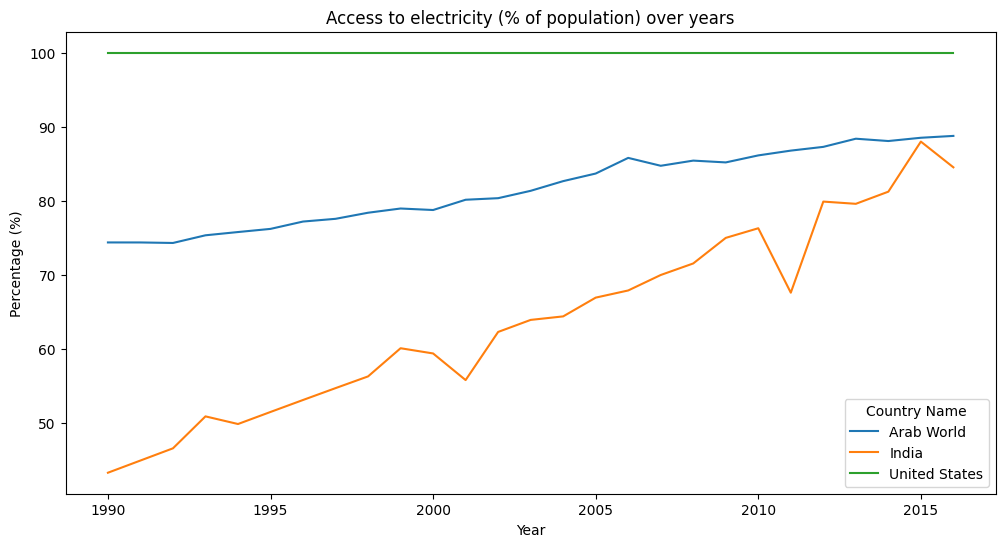

In [ ]:
indicator = 'Access to electricity (% of population)'
df_elec = df_long[df_long['Indicator Name'] == indicator]

countries = ['Arab World', 'India', 'United States']

df_elec_countries = df_elec[df_elec['Country Name'].isin(countries)]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_elec_countries, x='Year', y='Value', hue='Country Name')
plt.title(f'{indicator} over years')
plt.ylabel('Percentage (%)')
plt.show()


In [ ]:
df_elec_countries = df_elec_countries.sort_values(['Country Name', 'Year'])
df_elec_countries['Growth Rate'] = df_elec_countries.groupby('Country Name')['Value'].pct_change() * 100

print(df_elec_countries.head())


         Country Name Country Code                           Indicator Name  \
12664083   Arab World          ARB  Access to electricity (% of population)   
13086219   Arab World          ARB  Access to electricity (% of population)   
13508355   Arab World          ARB  Access to electricity (% of population)   
13930491   Arab World          ARB  Access to electricity (% of population)   
14352627   Arab World          ARB  Access to electricity (% of population)   

          Indicator Code  Year      Value  Growth Rate  
12664083  EG.ELC.ACCS.ZS  1990  74.384239          NaN  
13086219  EG.ELC.ACCS.ZS  1991  74.382220    -0.002714  
13508355  EG.ELC.ACCS.ZS  1992  74.313160    -0.092845  
13930491  EG.ELC.ACCS.ZS  1993  75.349325     1.394322  
14352627  EG.ELC.ACCS.ZS  1994  75.788522     0.582881  


In [ ]:
df_2000_2015 = df_elec[(df_elec['Year'] >= 2000) & (df_elec['Year'] <= 2015)]
growth = df_2000_2015.groupby('Country Name').apply(
    lambda x: ((x[x['Year'] == 2015]['Value'].values[0] - x[x['Year'] == 2000]['Value'].values[0]) /
               x[x['Year'] == 2000]['Value'].values[0]) * 100 if (2015 in x['Year'].values and 2000 in x['Year'].values) else None)

growth = growth.dropna().sort_values(ascending=False).head(10)
print("Top 10 countries by growth in electricity access (2000-2015):")
print(growth)


Top 10 countries by growth in electricity access (2000-2015):
Country Name
Liberia            138300.920147
South Sudan         79254.278431
Afghanistan          7349.810956
Solomon Islands       738.889301
Lesotho               555.665923
Somalia               414.867967
Rwanda                267.741935
Mali                  265.613121
Mozambique            258.473325
Timor-Leste           242.678643
dtype: float64


<ipython-input-9-9c6b5ed9da66>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  growth = df_2000_2015.groupby('Country Name').apply(


In [ ]:
print(df.shape)
print(df.columns)
df.head()


(422136, 63)
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.530494,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN


In [ ]:
electricity_df = df[df['Indicator Name'] == 'Access to electricity (% of population)']


In [ ]:
data = electricity_df.set_index('Country Name').iloc[:, 4:-1].transpose()
data = data.fillna(method='ffill').dropna(axis=1)  # forward fill + drop cols with NaNs


<ipython-input-15-f45799b8594e>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').dropna(axis=1)  # forward fill + drop cols with NaNs


In [ ]:
import pandas as pd

df = pd.read_csv("WDIData.csv")

df_filtered = df[df["Indicator Name"] == "Access to electricity (% of population)"]


In [ ]:

df_filtered = df_filtered.drop(columns=["Indicator Name", "Indicator Code", "Country Code", "Unnamed: 63"], errors='ignore')

df_filtered.set_index("Country Name", inplace=True)

data = df_filtered.transpose()

print(data.columns)


Index(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific', 'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Vietnam',
       'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country Name', length=264)


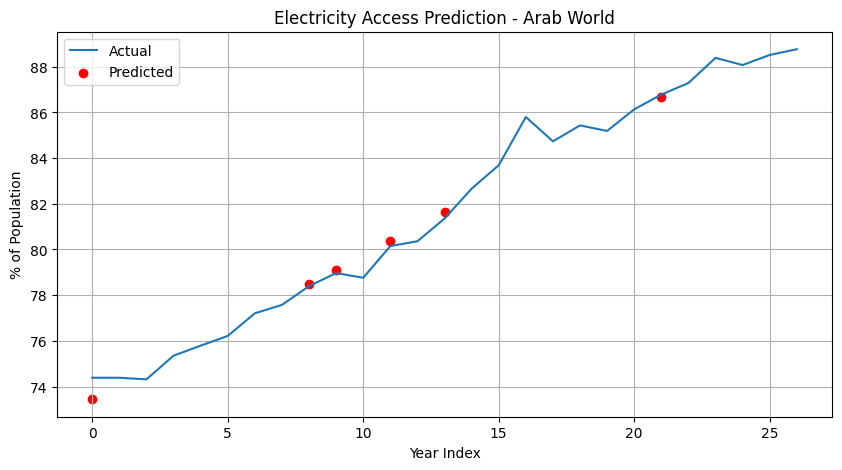

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


y = data['Arab World'].dropna()
X = np.array(range(len(y))).reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(X, y.values, label="Actual")
plt.scatter(X_test, y_pred, color='red', label="Predicted")
plt.title("Electricity Access Prediction - Arab World")
plt.xlabel("Year Index")
plt.ylabel("% of Population")
plt.legend()
plt.grid(True)
plt.show()
